In [24]:
#The goal is to determine the correlation between fielding percentage and winning percentage (regular season)
#The dataset is for all MLB teams since 1900

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [26]:
raw_data = pd.read_csv('Teams.csv')

#Raw dataset goes back to 1871, so pre-1900 rows must be dropped

df = pd.DataFrame(raw_data)


df = df[df.yearID >= 1900]


In [27]:
df

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
375,1900,NL,BRO,LAD,NaN,1,141,NaN,82,54,...,102,0.948,Brooklyn Superbas,Washington Park III,183000.0,106,104,BRO,BRO,BRO
376,1900,NL,BSN,ATL,NaN,4,142,NaN,66,72,...,86,0.953,Boston Beaneaters,South End Grounds III,202000.0,112,111,BSN,BSN,BSN
377,1900,NL,CHN,CHC,NaN,6,146,NaN,65,75,...,98,0.933,Chicago Orphans,West Side Park II,248577.0,96,98,CHC,CHN,CHN
378,1900,NL,CIN,CIN,NaN,7,144,NaN,62,77,...,120,0.945,Cincinnati Reds,League Park II in Cincinnati,170000.0,98,99,CIN,CIN,CIN
379,1900,NL,NY1,SFG,NaN,8,141,NaN,60,78,...,124,0.928,New York Giants,Polo Grounds III,190000.0,95,98,NYG,NY1,NY1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,2019,NL,SLN,STL,C,1,162,81.0,91,71,...,168,0.989,St. Louis Cardinals,Busch Stadium III,3480393.0,98,97,STL,SLN,SLN
2921,2019,AL,TBA,TBD,E,2,162,81.0,96,66,...,126,0.985,Tampa Bay Rays,Tropicana Field,1178735.0,97,96,TBR,TBA,TBA
2922,2019,AL,TEX,TEX,W,3,162,81.0,78,84,...,143,0.982,Texas Rangers,Globe Life Park in Arlington,2132994.0,111,112,TEX,TEX,TEX
2923,2019,AL,TOR,TOR,E,4,162,81.0,67,95,...,141,0.984,Toronto Blue Jays,Rogers Centre,1750114.0,97,98,TOR,TOR,TOR


In [28]:
df['Win%'] = df['W']/df['G']

#calculates winning percentage

df

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,Win%
375,1900,NL,BRO,LAD,NaN,1,141,NaN,82,54,...,0.948,Brooklyn Superbas,Washington Park III,183000.0,106,104,BRO,BRO,BRO,0.581560
376,1900,NL,BSN,ATL,NaN,4,142,NaN,66,72,...,0.953,Boston Beaneaters,South End Grounds III,202000.0,112,111,BSN,BSN,BSN,0.464789
377,1900,NL,CHN,CHC,NaN,6,146,NaN,65,75,...,0.933,Chicago Orphans,West Side Park II,248577.0,96,98,CHC,CHN,CHN,0.445205
378,1900,NL,CIN,CIN,NaN,7,144,NaN,62,77,...,0.945,Cincinnati Reds,League Park II in Cincinnati,170000.0,98,99,CIN,CIN,CIN,0.430556
379,1900,NL,NY1,SFG,NaN,8,141,NaN,60,78,...,0.928,New York Giants,Polo Grounds III,190000.0,95,98,NYG,NY1,NY1,0.425532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,2019,NL,SLN,STL,C,1,162,81.0,91,71,...,0.989,St. Louis Cardinals,Busch Stadium III,3480393.0,98,97,STL,SLN,SLN,0.561728
2921,2019,AL,TBA,TBD,E,2,162,81.0,96,66,...,0.985,Tampa Bay Rays,Tropicana Field,1178735.0,97,96,TBR,TBA,TBA,0.592593
2922,2019,AL,TEX,TEX,W,3,162,81.0,78,84,...,0.982,Texas Rangers,Globe Life Park in Arlington,2132994.0,111,112,TEX,TEX,TEX,0.481481
2923,2019,AL,TOR,TOR,E,4,162,81.0,67,95,...,0.984,Toronto Blue Jays,Rogers Centre,1750114.0,97,98,TOR,TOR,TOR,0.413580


In [29]:
x1 = df['FP']
y = df['Win%']


In [30]:
x = sm.add_constant(x1)
reg = sm.OLS(y,x).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Win%   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     115.1
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           2.67e-26
Time:                        22:20:01   Log-Likelihood:                 2832.1
No. Observations:                2550   AIC:                            -5660.
Df Residuals:                    2548   BIC:                            -5648.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2923      0.167     -7.745      0.000      -1.620      -0.965
FP             1.8354      0.171     10.730      0.000       1.500       2.171
==============================================================================
Omnibus:                       12.153   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                9.316
Skew:                          -0.037   Prob(JB):                      0.00949
Kurtosis:                       2.713   Cond. No.                         211.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Winning Percentage')

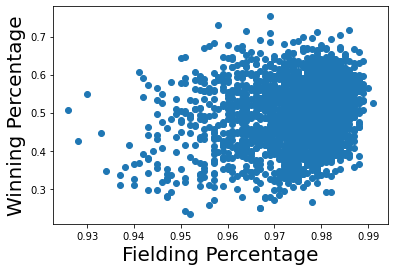

In [31]:
plt.scatter(x1,y)
plt.xlabel('Fielding Percentage', fontsize = 20)
plt.ylabel('Winning Percentage', fontsize = 20)

While the P-value is strong enough to suggest that there is some relationship between fielding percentage and winning percentage, the R^2 of 0.043 is small enough to suggest that it is not a strong linear relationship between these values for teams since 1900.